In [15]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [16]:
# 제출 점수(제출 날짜) : 0.6360667858(2021-12-17 15:52:08)

# 설정

In [17]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거 : ⭕
# tune_cat

# 데이터 불러오기

In [18]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [20]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [22]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [23]:
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

## 훈련에 의미가 적은 열 제거

In [24]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거 : ⭕
# person_rn, contents_rn 제거 : ❌

In [25]:
train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1)
test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_h_1       501951 non-null  int64
 15  

In [27]:
train.iloc[:,15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   person_prefer_h_2       501951 non-null  int64
 1   person_prefer_h_3       501951 non-null  int64
 2   contents_attribute_i    501951 non-null  int64
 3   contents_attribute_a    501951 non-null  int64
 4   contents_attribute_j_1  501951 non-null  int64
 5   contents_attribute_j    501951 non-null  int64
 6   contents_attribute_c    501951 non-null  int64
 7   contents_attribute_k    501951 non-null  int64
 8   contents_attribute_l    501951 non-null  int64
 9   contents_attribute_d    501951 non-null  int64
 10  contents_attribute_m    501951 non-null  int64
 11  contents_attribute_e    501951 non-null  int64
 12  contents_attribute_h    501951 non-null  int64
 13  person_rn               501951 non-null  int64
 14  contents_rn             501951 non-null  int64
 15  

# 모델 학습/예측

In [29]:
ex = setup(train, target='target', n_jobs=3, session_id=0, verbose=False, silent=False, 
 fold=5, fold_shuffle=True, combine_rare_levels=True)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
d_l_match_yn,Categorical
d_m_match_yn,Categorical
d_s_match_yn,Categorical
h_l_match_yn,Categorical
h_m_match_yn,Categorical
h_s_match_yn,Categorical
person_attribute_a,Categorical
person_attribute_a_1,Categorical
person_attribute_b,Categorical
person_prefer_c,Categorical


In [30]:
compare_models(sort='F1')
# 46m 28s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6226,0.6720,0.6698,0.6117,0.6394,0.2452,0.2463,63.7240
xgboost,Extreme Gradient Boosting,0.6189,0.6666,0.6672,0.6081,0.6363,0.2379,0.2390,75.2660
lightgbm,Light Gradient Boosting Machine,0.6128,0.6593,0.6687,0.6012,0.6331,0.2257,0.2271,5.7800
rf,Random Forest Classifier,0.6130,0.6602,0.6215,0.6108,0.6161,0.2260,0.2260,68.6640
gbc,Gradient Boosting Classifier,0.5996,0.6413,0.6393,0.5920,0.6147,0.1993,0.1999,119.3920
ada,Ada Boost Classifier,0.5932,0.6318,0.6185,0.5884,0.6031,0.1865,0.1867,23.6720
et,Extra Trees Classifier,0.5981,0.6378,0.5955,0.5983,0.5969,0.1962,0.1962,90.5920
ridge,Ridge Classifier,0.5892,0.0000,0.6057,0.5860,0.5957,0.1784,0.1785,0.6760
lda,Linear Discriminant Analysis,0.5892,0.6242,0.6057,0.5860,0.5957,0.1784,0.1785,7.5160
qda,Quadratic Discriminant Analysis,0.5025,0.5026,0.7449,0.5012,0.5953,0.0053,0.0077,6.3400


In [31]:
cat = create_model('catboost')
# 7m 8s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6202,0.6703,0.6667,0.6096,0.6369,0.2404,0.2415
1,0.6218,0.6713,0.6695,0.6109,0.6389,0.2436,0.2448
2,0.6228,0.6741,0.6694,0.6121,0.6395,0.2457,0.2468
3,0.6244,0.6733,0.6711,0.6134,0.6410,0.2488,0.2499
4,0.6238,0.6710,0.6722,0.6126,0.6410,0.2476,0.2488
Mean,0.6226,0.6720,0.6698,0.6117,0.6394,0.2452,0.2463
SD,0.0015,0.0015,0.0018,0.0013,0.0015,0.0030,0.0030


In [32]:
tuned_cat = tune_model(cat)
# 13m 22s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6157,0.6616,0.6586,0.6063,0.6314,0.2315,0.2324
1,0.6157,0.6623,0.6598,0.6061,0.6318,0.2315,0.2324
2,0.6195,0.6664,0.6635,0.6096,0.6354,0.2391,0.2401
3,0.6195,0.6660,0.6613,0.6099,0.6346,0.2390,0.2398
4,0.6161,0.6628,0.6629,0.6059,0.6331,0.2322,0.2332
Mean,0.6173,0.6638,0.6612,0.6075,0.6332,0.2347,0.2356
SD,0.0018,0.0020,0.0018,0.0018,0.0016,0.0036,0.0036


In [33]:
pred = predict_model(tuned_cat, test)

In [34]:
pred.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,Label,Score
0,True,False,False,True,True,True,1,1,2,1,...,2,1147,839,1,5,263,393790,236865,1,0.5109
1,False,False,False,True,False,False,2,0,2,2,...,2,1611,278,1,4,263,394058,236572,0,0.5951
2,True,False,False,True,True,True,2,3,2,1,...,2,1817,490,3,4,177,1002061,704612,0,0.5639
3,True,False,False,True,True,True,1,2,2,5,...,2,101,150,5,3,177,1000813,704652,0,0.5229
4,True,False,False,True,False,False,1,6,4,5,...,1,985,1097,1,4,177,111146,704413,0,0.5681


In [35]:
pred.iloc[:,-2:].head()

,Label,Score
0,1,0.5109
1,0,0.5951
2,0,0.5639
3,0,0.5229
4,0,0.5681


In [36]:
pred['Label'].value_counts()

1    25269
0    21135
Name: Label, dtype: int64

# 제출파일 생성

In [37]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver0.7.csv', index=False)

# 모델 분석 그래프

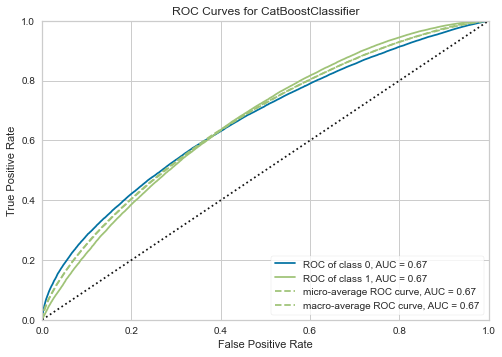

In [38]:
plot_model(tuned_cat)